In [41]:
import cv2
import numpy as np
from PIL import ImageGrab
from PIL import Image
import os

In [18]:
template_path = os.path.join(os.getcwd(), 'templates', 'box.png')
image = Image.open(template_path)


screen = ImageGrab.grab()

In [42]:
template_path = os.path.join(os.getcwd(), 'templates', 'box.png')
image = Image.open(template_path)

screen = Image.open('resized_sex.png')

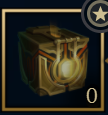

In [43]:
image

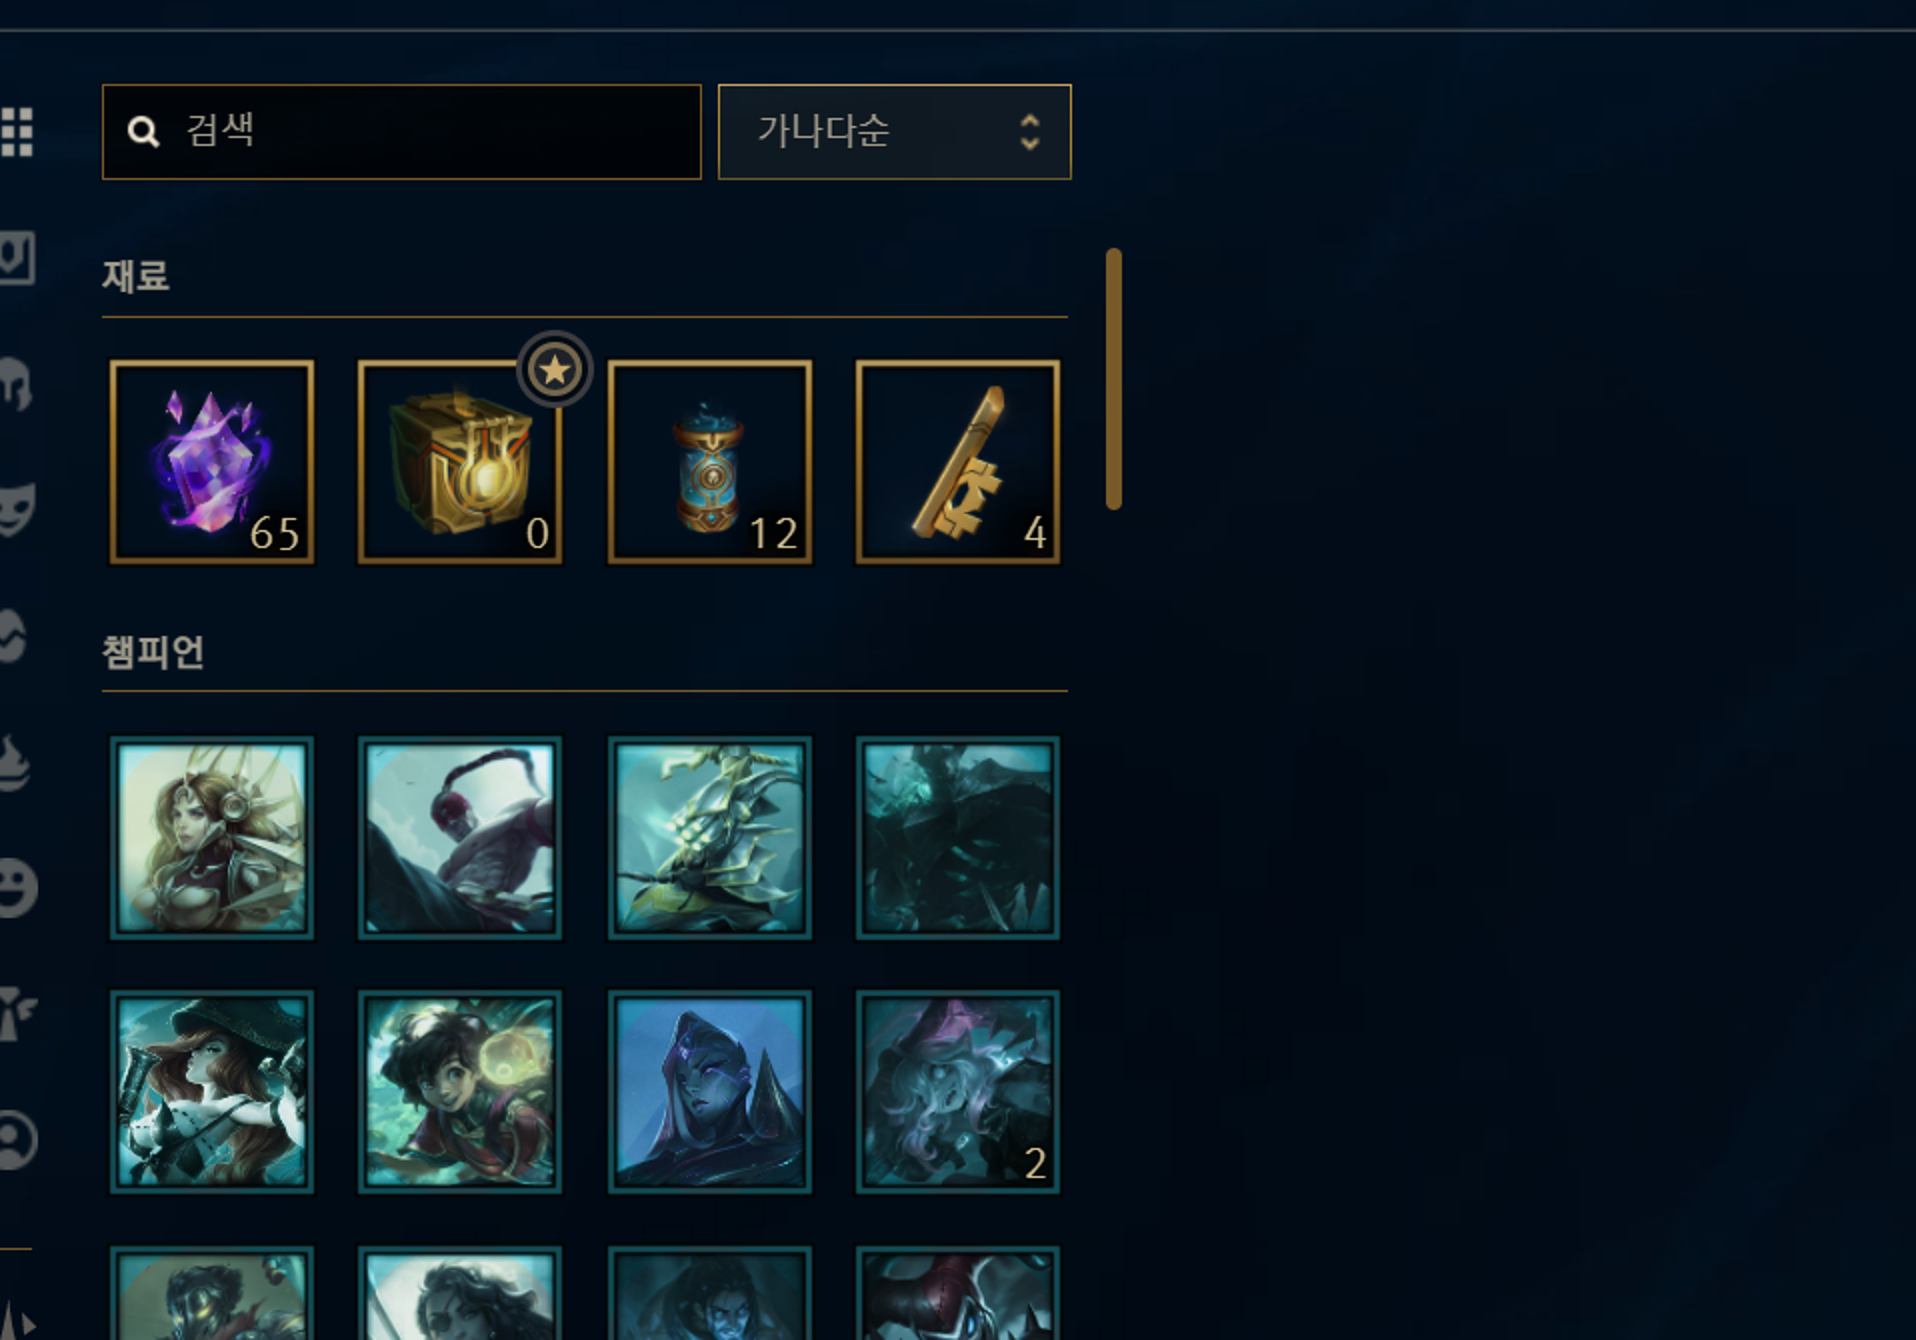

In [44]:
screen

In [45]:
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)


# SIFT 객체 생성
sift = cv2.SIFT_create()

# 특징점 추출
keypoints, descriptors = sift.detectAndCompute(image_cv, None)

In [46]:
screen_cv = cv2.cvtColor(np.array(screen), cv2.COLOR_RGB2BGR)


# screen 이미지에서도 특징점 추출
keypoints_screen, descriptors_screen = sift.detectAndCompute(screen_cv, None)

In [47]:
# BFMatcher 생성
bf = cv2.BFMatcher()

# 매칭
matches = bf.knnMatch(descriptors, descriptors_screen, k=2)

In [48]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [49]:
image_points = np.float32([keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
screen_points = np.float32([keypoints_screen[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)


In [50]:
for i in range(len(image_points)):
    pt1 = tuple(map(int, image_points[i][0]))
    pt2 = tuple(map(int, screen_points[i][0]))
    cv2.rectangle(screen_cv, pt1, pt2, (0, 255, 0), 2)

In [27]:
cv2.imshow("SIFT Matching Result", screen_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
cv2.imwrite('saved_image.png', screen_cv)

True

In [1]:
import pygetwindow as gw
from pywinauto import application
windows = gw.getAllTitles()

In [2]:
windows

['',
 '',
 'LEAGUE OF LEGENDS CAPTULE OPENER',
 '',
 '● test3.ipynb - League-of-Legends-Capsule-Opener - Visual Studio Code',
 'ChatGPT - Chrome',
 'KakaoTalkEdgeWnd',
 '쉐프',
 'KakaoTalkShadowWnd',
 '진우',
 'KakaoTalkShadowWnd',
 'KakaoTalkEdgeWnd',
 '설정',
 '설정',
 'NVIDIA GeForce Overlay',
 'Windows 입력 환경',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'MINGW64:/c/Users/crypt/WorkSpace_C/projects_240529~/League-of-Legends-Capsule-Opener',
 '사용자의 손가락별 stroke 특성을 이용한 어쩌구.pdf - 프로필 1 - Microsoft\u200b Edge',
 'League of Legends',
 '',
 '',
 'Program Manager']

In [34]:
new_img = Image.open('sex.png')

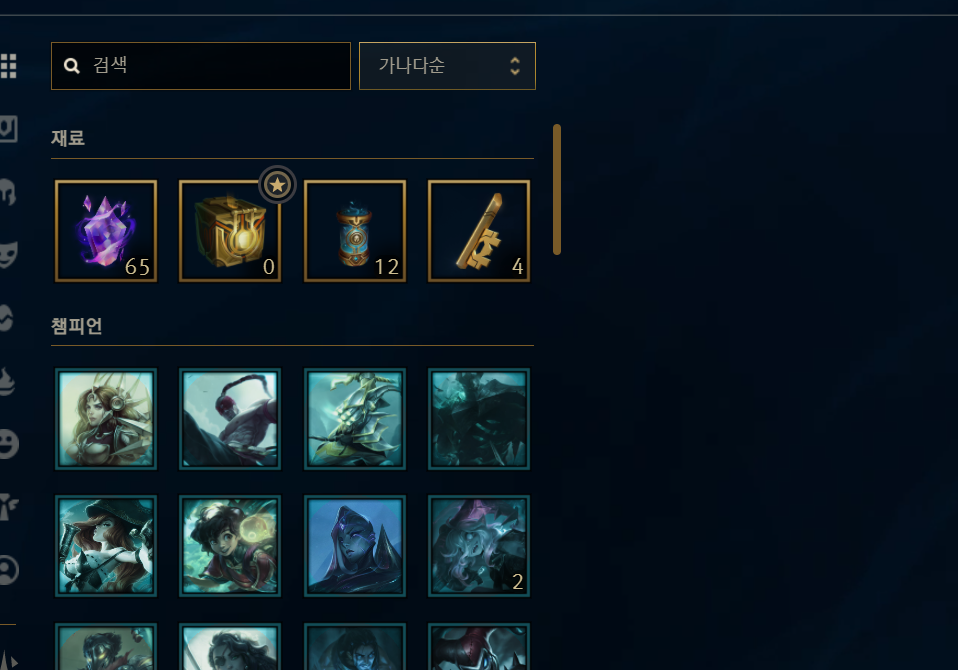

In [35]:
new_img

In [37]:
resized_img = new_img.resize((new_img.size[0]*2, new_img.size[1]*2))

In [39]:
resized_img.save('resized_sex.png')